# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 4. Доверительные интервалы
### Дедлайн --- 23 ноября 9:00

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 10 баллов**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

from tqdm.notebook import tqdm
from typing import Callable

sns.set(font_scale=1.4, style='whitegrid', palette='Set2')

## Задача 1

Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$.

Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
изобразите на графиках в координатах $(n, \theta)$
* Доверительный интервал оценки $\widehat{\theta}$
* График оценки $\widehat{\theta}$
* Точки выборки

Для отрисовки доверительного интервала используйте `plt.fill_between`. Не забывайте про параметр `alpha`.

Для того, чтобы избежать дублирования кода, рекомендуем написать функцию `draw_confidence_interval`, изображающую на графике все необходимое.

In [314]:
THETA = 10
ALPHA = 0.95
N = 100

def draw_confidence_interval(lower_int, upper_int, estimate, sample):
    plt.figure(figsize=(14,8))
    plt.fill_between(np.linspace(1, 100, 100), lower_int, upper_int, label="Доверительный интервал", alpha = 0.5)
    plt.plot(np.linspace(1, 100, 100), estimate, label = '$\\widehat{\\theta}$')
    plt.scatter(np.linspace(1, 100, 100), sample, label = 'Точки выборки')
    plt.legend()
    plt.ylim([-5, 20])
    plt.xlim([1, len(sample)])
    plt.show()

Выполните задание для следующих $P_\theta$ и $\widehat{\theta}$ (формулы доверительных итервалов были получены на семинарах):

### 1. Равномерное распределение, $\theta = 10$, оценка $\widehat{\theta} = X_{(n)}$

$\frac{X_(n)}{\sqrt[n]{1 - \epsilon_2}} \leq \theta \leq \frac{X_(n)}{\sqrt[n]{\epsilon_1}}$

где $\epsilon_1 + \epsilon_2 = 1 - \alpha$

In [315]:
eps1 = 0.035
eps2 = 1 - ALPHA - eps1

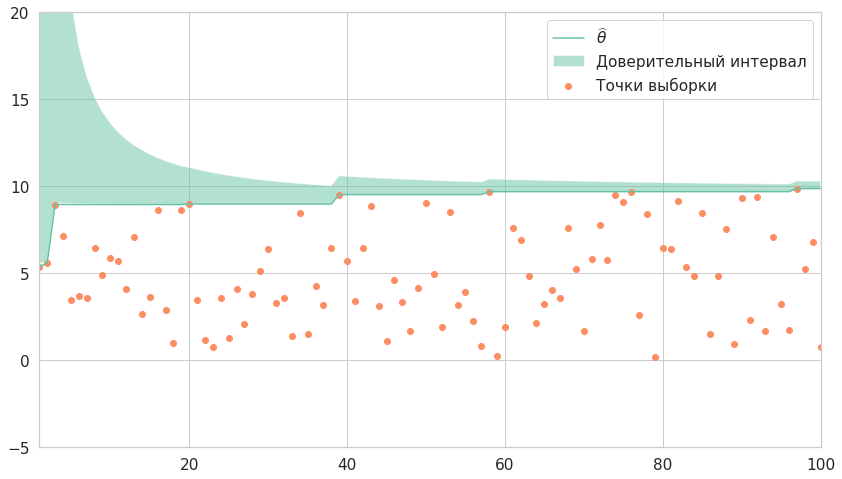

In [316]:
uniform_vals = sps.uniform.rvs(scale = 10, size = N)
estimation = np.maximum.accumulate(uniform_vals)
lower_int = [estimation[i]/( (1 - eps1) ** ((i+1)**(-1)) ) for i in range(N)]
upper_int = [estimation[i]/( eps2 ** ((i+1)**(-1)) ) for i in range(N)]

draw_confidence_interval(lower_int, upper_int, estimation, uniform_vals)

### 2. Распределение Коши, $\theta = 10$, оценка — медиана

In [303]:
# YOUR CODE GOES HERE

### 3. Распределение Пуассона, $\theta = 10$, оценка $\widehat{\theta} = \overline{X}$

$(\sqrt{\overline{X} - \frac{1}{4(1 - \alpha)n}} - \sqrt{\frac{1}{4(1 - \alpha)n}})^2 \leq \theta \leq (\sqrt{\overline{X} - \frac{1}{4(1 - \alpha)n}} + \sqrt{\frac{1}{4(1 - \alpha)n}})^2$

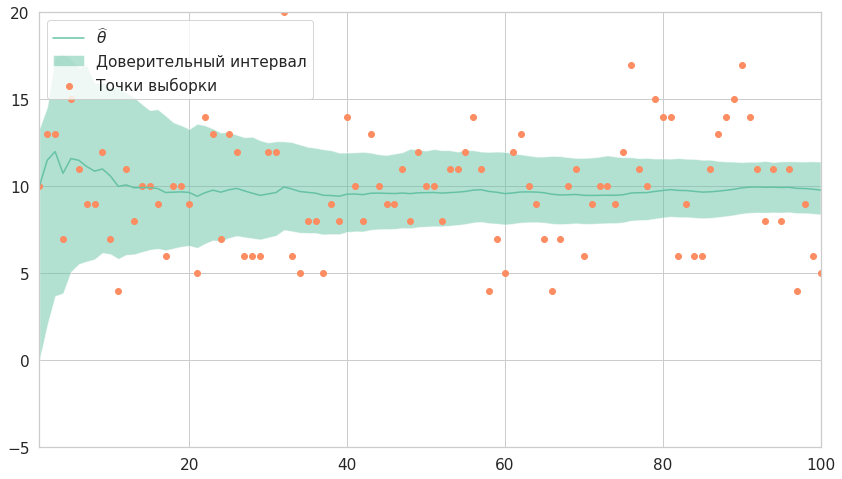

In [330]:
poiss_vals = sps.poisson.rvs(mu = 10, size = N)
estimation = np.cumsum(poiss_vals) / np.arange(1, N + 1)
lower_int = [((estimation[i] - (4*(1 - ALPHA)*(i + 1))**(-1))**(0.5) 
               - ((4*(1 - ALPHA)*(i + 1))**(-1))**(0.5))**2 for i in range(N)] 
upper_int = [((theta_poisson[i] - (4*(1 - ALPHA)*(i + 1))**(-1))**(1/2) 
               + ((4*(1 - ALPHA)*(i + 1))**(-1))**(0.5))**2 for i in range(N)] 

draw_confidence_interval(lower_int, upper_int, estimation, poiss_vals)

### 4. Гамма-распределение, $(\theta, \lambda) = (10, 3)$, $\lambda$ известна

Сделайте выводы о размерах и форме доверительных интервалов для каждого случая.

**Вывод**: для равномерного распределения интервал 'непрерывный' выступает над оценкой $\theta$ и является достаточно узким. В распределении Пуассона интервал 'непрерывный', оценка $\theta$ находится примерно по середине

# Задача 2

Для $n = 100$ оцените для кажого пункта предыдущей задачи вероятность попадания истинного значения
$\theta$ в интервал. Для этого нужно сделать слудующее:
1. Сгенерируйте достаточно много выборок из $P_{\theta}$
2. Постройте по каждой из них интервалы для $\widehat{\theta}$
3. Определите, сколько раз истинное значение $\theta.$ попадает в построенные интервалы. Таким способом будет
построена бернуллиевская выборка, по ней оцените вероятность.

Предположите, какое количество выборок нужно взять. Обоснуйте свой выбор.

__Ответ:__

In [ ]:
# YOUR CODE GOES HERE

### Равномерное распределение

In [ ]:
# YOUR CODE GOES HERE

### Распределение Коши

In [ ]:
# YOUR CODE GOES HERE

### Распределение Пуассона

In [ ]:
# YOUR CODE GOES HERE

### Гамма-распределение

In [ ]:
# YOUR CODE GOES HERE

Сделайте выводы.

# Задача 3

В этой задаче мы построим точный и асимптотический доверительный интевалы для нормального распределения и сравним их.

Пусть $X_1, \dots, X_n$ — выборка из нормального распределения со средним $a$ и дисперсией $\sigma^2$, причем $\sigma$ неизвестна. Выпишите формулы

* точного доверительного итервала уровня доверия $\alpha$ для $a$:

* асимптотического доверительного итервала уровня доверия $\alpha$ для $a$


Точный доверительный интервал: $(\overline{X} - t_{1 - \frac{\alpha}{2},N - 1}\frac{s}{\sqrt{N - 1}} \leq a \leq \overline{X} + t_{1 - \frac{\alpha}{2},N - 1}\frac{s}{\sqrt{N - 1}}) = \alpha$

Гдe  $t_{1 - \frac{\alpha}{2},N - 1}$ - это квантиль распределния стьюдента, а $s$ - это среднеквадратическое отклонение

Асимптотический доверительный интервал: $(\overline{X} - \frac{z_\frac{\alpha}{2} \cdot s}{\sqrt{N}} \leq a \leq \overline{X} + \frac{z_\frac{\alpha}{2} \cdot s}{\sqrt{N}}) \geq \alpha$

где $𝑠$ - это среднеквадратическое отклонение, а $z_\frac{\alpha + 1}{2}$ - квантиль нормального распределения

Для $n=30, \,a = 0$ постройте __на одном графике__ точный и асимптотический доверительный интервал, а также отметьте линией истинное значение $a$

In [228]:
def calculate_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
):
    """Вычисление точного доверительного интервала уровня доверия alpha. """
    N = len(sample)
    mean = np.mean(sample)
    standart_dev = np.std(sample)
    quantile = sps.t.ppf(1 - 0.5*alpha, N - 1)
    return [mean - quantile*standart_dev*(np.sqrt(N-1)*(-0.5)), mean + quantile*standart_dev*(np.sqrt(N-1)*(-0.5))]

In [270]:
def calculate_asymptotic_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
):
    """Вычисление асимптотического доверительного интервала уровня доверия alpha. """
    N = len(sample)
    mean = np.mean(sample)
    standart_dev = np.std(sample)
    quantile = sps.norm.ppf(0.5*(alpha))
    return [mean - quantile*standart_dev*(np.sqrt(N)*(-0.5)), mean + quantile*standart_dev*(np.sqrt(N)*(-0.5))]

In [271]:
N = 30

In [272]:
norm_vals = sps.norm.rvs(loc = 0, size = N)

In [277]:
all_conf_intervals = []
all_asymptotic_conf_intervals = []
all_means = []

for i in range(N):
    all_conf_intervals.append(calculate_conf_interval(norm_vals[:i+1]))
    all_asymptotic_conf_intervals.append(calculate_asymptotic_conf_interval(norm_vals[:i+1]))
    all_means.append(np.mean(norm_vals[:i+1]))
    
all_conf_intervals = np.array(all_conf_intervals)
all_asymptotic_conf_intervals = np.array(all_asymptotic_conf_intervals) 
all_means = np.array(all_means) 

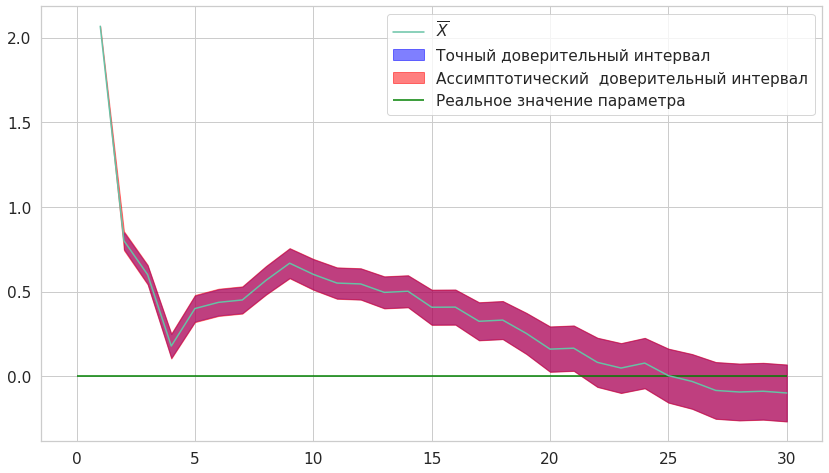

In [284]:
plt.figure(figsize=(14, 8))
plt.fill_between(np.linspace(1, 30, 30), all_conf_intervals[:, 0], all_conf_intervals[:, 1], alpha = 0.5, 
                                                         color="blue", label="Точный доверительный интервал")
plt.fill_between(np.linspace(1, 30, 30), all_asymptotic_conf_intervals[:, 0], all_asymptotic_conf_intervals[:, 1], 
                                        alpha = 0.5, color="red", label="Ассимптотический  доверительный интервал")
plt.plot(np.linspace(1, 30, 30), all_means, label="$\\overline {X}$")
plt.hlines(0, 0, 30, color = 'green', label='Реальное значение параметра')
plt.legend()
plt.show()

Сделайте выводы. В каких случаях уместно использовать асимптотический интервал вместо точного?

**Вывод**: Для нормального распределения нет разницы какой интервал использовать

# Задача 4

В этой задаче мы проанализируем изменение индекса качества воздуха (air quality index, AQI) для двух мегаполисов Индии за последние годы. Данные взяты с Kaggle (https://www.kaggle.com/rohanrao/air-quality-data-in-india)

In [191]:
!gdown https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC 

Downloading...
From: https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC
To: /home/syrnik/stats/city_day.csv
2.57MB [00:00, 5.51MB/s]


Загрузите файл `city_day.csv`. Нам понадобятся столбцы `City`, `Date` и `AQI`. При этом учтите, что:
* В дальнейшем мы будем работать с датами, поэтому используйте аргумент `parse_dates` чтобы корректо их распарсить
* Данные содержат пропуски, которые нужно удалить

In [192]:
import pandas as pd
data = pd.read_csv("city_day.csv", parse_dates = ['Date'])[["City", "Date", "AQI"]]
data = data.dropna()

Для удобства сохраните в отдельные поля `Month` и `Year` соответственно год и месяц, когда производились замеры

In [193]:
data['Month'] = data.Date.dt.month
data['Year'] = data.Date.dt.year

Нас будут интересовать два города: Мумбаи (Mumbai) и Калькутта (Kolkata). Сохраните данные по этим двум городам для всех днней с 1 июля 2018 года включительно

In [197]:
mumbai = data.loc[(data.Year >= 2018) & (data.City == "Mumbai")]
index = mumbai.loc[(mumbai.Year == 2018) & (mumbai.Month < 7)].index
mumbai.drop(index, inplace=True)
kolkata = data.loc[(data.Year >= 2018) & (data.City == "Kolkata")]
index = kolkata.loc[(kolkata.Year == 2018) & (kolkata.Month < 7)].index
kolkata.drop(index, inplace=True)

/home/syrnik/.local/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/home/syrnik/.local/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


В предыдущих задачах мы строили доверительные интервалы в предположении, что выборка взята из параметрического семейства распределений. Но что делать в случае, когда подобное предположение сделать нельзя? Оказывается, в этом случае можно строить доверительный интервал с помощью бутстрепа.

Пусть $X_1, \dots, X_n$ — выборка, для которой мы хотим оценить некоторую величину $\theta$. Построим $k$ бутстепных выборок, и получим по ним оценки $\theta^*_1, \dots, \theta^*_k$. Отсортируем их, чтобы получить вариационный ряд $\theta^*_{(1)}, \dots, \theta^*_{(k)}$. Тогда получим, что
$$
C^* = \left(\theta^*_{(\lfloor k (1 + \alpha) / 2 \rfloor)},
\theta^*_{(\lceil k (1 - \alpha) / 2 \rceil)} \right)
$$
будет (приблизительным) доверительным интервалом для $\theta$ уровня доверия $\alpha$.

Для каждого месяца с июля 2018 по июнь 2020 включтельно постройте бутстрепный доверительный интервал для __среднего значения AQI__. В этом вам помогут следующие вспомогательные функции:

In [198]:
def get_dataset_by_month(
    df: pd.DataFrame, 
    year: int,
    month: int
):
    """ Сохранение в массив данные для указанного месяца и года."""
    
    return df.loc[(df.Month == month) & (df.Year == year)]["AQI"]

In [199]:
def get_bootstrap_samples(
    sample: np.ndarray,
    k: int = 1000
):
    """ Построение k бутстрепных выборок для указанной выборки. """
    
    return [np.random.choice(sample, size = len(sample)) for i in range(k)]

In [200]:
def bootstrap_conf_interval(
    samples: np.ndarray,
    estimator: Callable = lambda x: np.mean(x, axis=-1),
    alpha: float = 0.95,
):
    """ Построение бутстрепных доверительных интервалов. """
    k = len(samples)
    estimations = []
    for sample in samples:
        estimations.append(estimator(sample))
    
    sorted_estimations = np.sort(estimations)
    
    return [sorted_estimations[int(0.5*k*(1 + alpha))], sorted_estimations[int(0.5*k*(1 - alpha))]]

Постройте на одном графике доверительные интервалы для Мумбаи и Калькутты. Также отметьте точками на графике истинный средний AQI и соедините точки линиями. Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

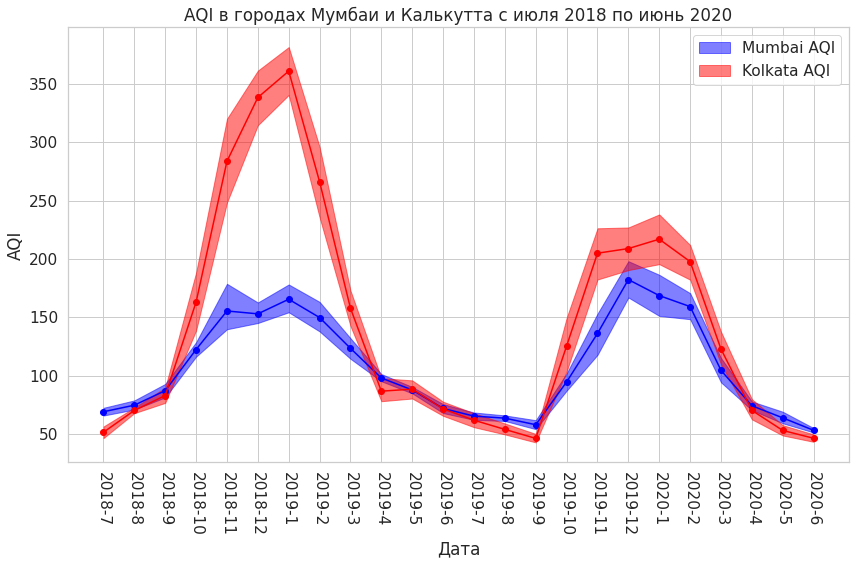

In [225]:
ym = mumbai[['Year', 'Month']].drop_duplicates().values[:-1]
labels = [f"{year}-{month}" for year, month in ym] # номера месяцев для подписей на графике 

mumbai_confidence_intervals = []
kolkata_confidence_intervals = []

mumbai_mean_aqi = []
kolkata_mean_aqi = []

for year, month in ym:
    # Достаем данные для Мумбаи
    mumbai_data = get_dataset_by_month(mumbai, year, month)
    # Находим доверительные интервалы
    mumbai_bootstrap = get_bootstrap_samples(mumbai_data)
    mumbai_conf_interval = bootstrap_conf_interval(mumbai_bootstrap)
    mumbai_confidence_intervals.append(mumbai_conf_interval)
    # Находим среднее по каждому месяцу
    mumbai_mean_aqi.append(np.mean(mumbai_data))
    
    
    # Достаем данные для Калькутты
    kolkata_data = get_dataset_by_month(kolkata, year, month)
    # Находим доверительные интервалы
    kolkata_bootstrap = get_bootstrap_samples(kolkata_data)
    kolkata_conf_interval = bootstrap_conf_interval(kolkata_bootstrap)
    kolkata_confidence_intervals.append(kolkata_conf_interval)
    # Находим среднее по каждому месяцу
    kolkata_mean_aqi.append(np.mean(kolkata_data))
    
# Сделаем их них numpy массивы, т.к. с ними будет проще работать 
mumbai_confidence_intervals = np.array(mumbai_confidence_intervals)
kolkata_confidence_intervals = np.array(kolkata_confidence_intervals)

# Делаем график
plt.figure(figsize=(14, 8))
plt.fill_between(labels, mumbai_confidence_intervals[:, 0], mumbai_confidence_intervals[:, 1], 
                                                                    alpha = 0.5, color="blue", label="Mumbai AQI")
plt.fill_between(labels, kolkata_confidence_intervals[:, 0], kolkata_confidence_intervals[:, 1], 
                                                                     alpha = 0.5, color="red", label="Kolkata AQI")
plt.plot(labels, mumbai_mean_aqi, marker='o', color = 'blue')
plt.plot(labels, kolkata_mean_aqi, marker='o', color = 'red')
plt.title("AQI в городах Мумбаи и Калькутта с июля 2018 по июнь 2020")
plt.xlabel("Дата")
plt.ylabel("AQI")
plt.xticks(rotation=270)
plt.legend()
plt.show()

Посмотрите на получившийся график. Видны ли в нем какие-либо закономерности? С чем они могут быть связаны?

**Вывод**: Можно заметить что зимой происходит резкое увеличение индекса качества воздуха в обоих городах. Это может быть связано с уменьшением числа людей в самих городах(например из-за праздников), а так же с сезоном дождей, который вынуждает население сидеть по домам

Теперь давайте сравним качество воздуха в апреле 2019 и апреле 2020 годов. Постройте __на одном графике__
* доверительные интервалы для апреля 2019 и апреля 2020 для Мумбаи
* истинные средние значения (с помощью `plt.hlines`)
* точки выборки

Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

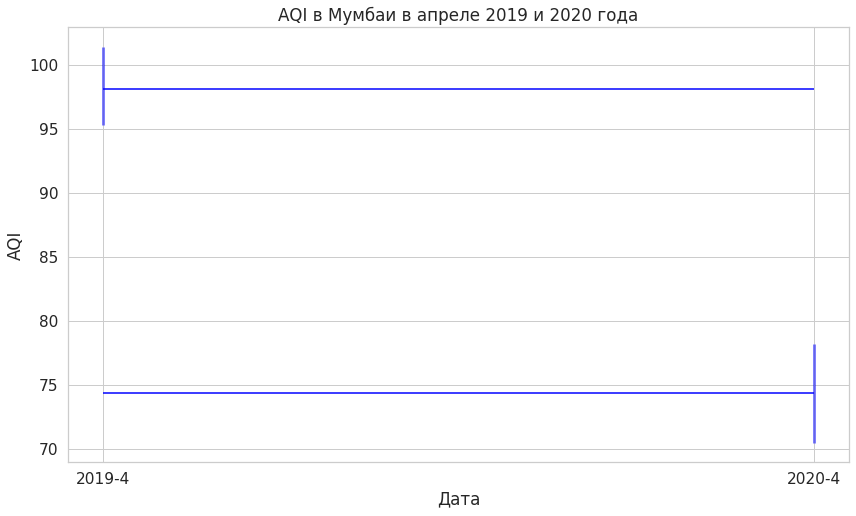

In [223]:
plt.figure(figsize=(14, 8))
plt.fill_between('2019-4', mumbai_confidence_intervals[:, 0][9], mumbai_confidence_intervals[:, 1][9], 
                                                                         linewidth = 3, alpha = 0.5, color="blue")
plt.fill_between('2020-4', mumbai_confidence_intervals[:, 0][21], mumbai_confidence_intervals[:, 1][21], 
                                                                         linewidth = 3, alpha = 0.5, color="blue")
plt.hlines(mumbai_mean_aqi[9], xmin = '2019-4', xmax = '2020-4', color = 'blue')
plt.hlines(mumbai_mean_aqi[21], xmin = '2019-4', xmax = '2020-4', color = 'blue')
plt.title("AQI в Мумбаи в апреле 2019 и 2020 года")
plt.xlabel("Дата")
plt.ylabel("AQI")
plt.show()

Теперь проделайте то же самое для Калькутты

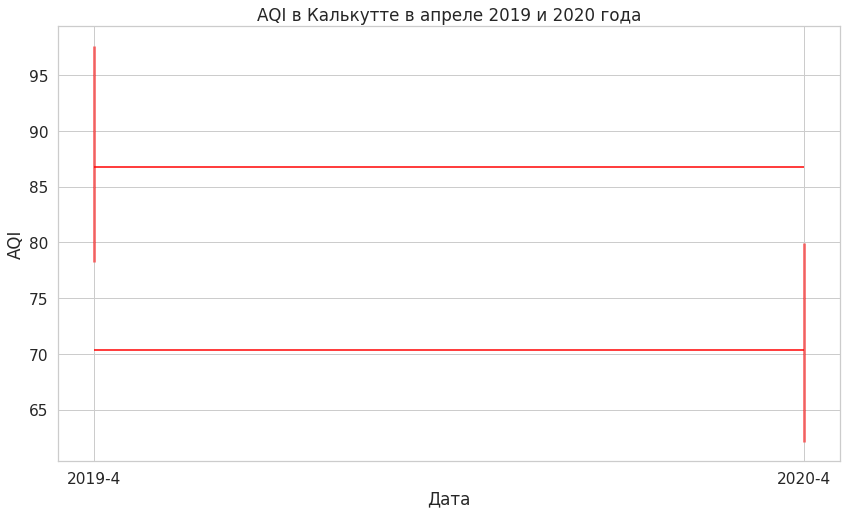

In [222]:
plt.figure(figsize=(14, 8))
plt.fill_between('2019-4', kolkata_confidence_intervals[:, 0][9], kolkata_confidence_intervals[:, 1][9], 
                                                                         linewidth = 3, alpha = 0.5, color="red")
plt.fill_between('2020-4', kolkata_confidence_intervals[:, 0][21], kolkata_confidence_intervals[:, 1][21], 
                                                                         linewidth = 3, alpha = 0.5, color="red")
plt.hlines(kolkata_mean_aqi[9], xmin = '2019-4', xmax = '2020-4', color = 'red')
plt.hlines(kolkata_mean_aqi[21], xmin = '2019-4', xmax = '2020-4', color = 'red')
plt.title("AQI в Калькуттe в апреле 2019 и 2020 года")
plt.xlabel("Дата")
plt.ylabel("AQI")
plt.show()

Сделайте выводы. Что можно сказать про доверительные интервалы в каждом из случаев?

**Вывод**: Истинное среднее значение индекса качества воздуха упало в обоих городах за один год. Но можно заметить, что в Калькутте это падение не настолько резкое. Доверительные интервалы для Мумбаи не накладываются друг на друга, а для Калькутты накладываются. Это лищний раз демонстрирует что качество воздуха намного сильнее упало для Мумбаи 